In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [8]:
data = []
labels = []
classes = 44
cur_path = os.getcwd()


In [9]:

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {a}: {e}")

In [10]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(44193, 30, 30, 3) (44193,)


In [11]:


# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=43)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(35354, 30, 30, 3) (8839, 30, 30, 3) (35354,) (8839,)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Applying data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

In [13]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 44)
y_test = to_categorical(y_test, 44)

In [14]:
# Building the model with regularization
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(rate=0.5))
model.add(Dense(44, activation='softmax'))

In [15]:

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1105/1105 [==============================] - 83s 74ms/step - loss: 4.2313 - accuracy: 0.2142 - val_loss: 2.1492 - val_accuracy: 0.5130
Epoch 2/20
1105/1105 [==============================] - 83s 75ms/step - loss: 2.0947 - accuracy: 0.5045 - val_loss: 1.1534 - val_accuracy: 0.7854
Epoch 3/20
1105/1105 [==============================] - 85s 77ms/step - loss: 1.5408 - accuracy: 0.6653 - val_loss: 0.8380 - val_accuracy: 0.8856
Epoch 4/20
1105/1105 [==============================] - 89s 80ms/step - loss: 1.2602 - accuracy: 0.7540 - val_loss: 0.7188 - val_accuracy: 0.9113
Epoch 5/20
1105/1105 [==============================] - 89s 80ms/step - loss: 1.1207 - accuracy: 0.8008 - val_loss: 0.6245 - val_accuracy: 0.9461
Epoch 6/20
1105/1105 [==============================] - 89s 80ms/step - loss: 1.0065 - accuracy: 0.8365 - val_loss: 0.5937 - val_accuracy: 0.9579
Epoch 7/20
1105/1105 [==============================] - 88s 80ms/step - loss: 0.9286 - accuracy: 0.8612 - val_loss: 0.5760 -

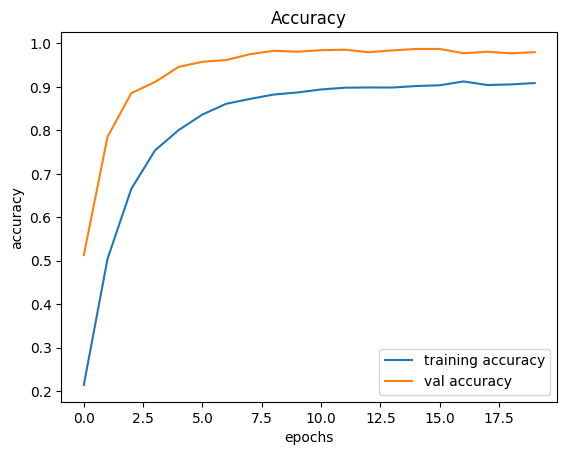

In [16]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

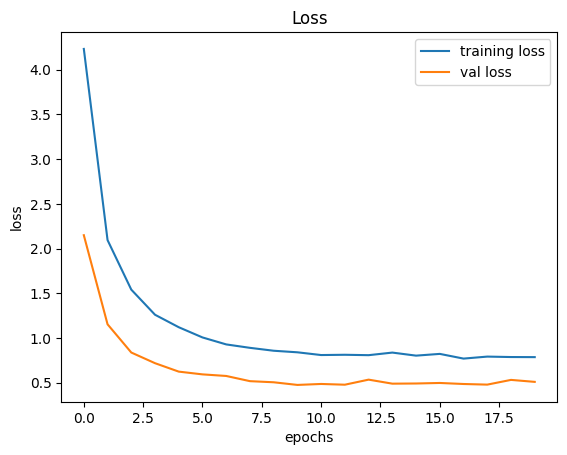

In [17]:


plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
# Save the trained model
model.save('traffic_classifier_sub.h5')